### CNN (Convolutional Neural Network, 합성곱 신경망)
- 실제 이미지 데이터는 분류 대상이 이미지에서 고정된 위치에 있지 않은 경우가 대부분이다.
- 실제 이미지 데이터를 분류하기 위해서는 이미지의 각 feature들을 그대로 학습하는 것이 아닌,  
  CNN으로 패턴을 인식한 뒤 학습해야 한다.

<div style='display: flex; width: 70%; margin-bottom: 30px;'>
    <div>
        <img src='./images/dogs01.png' width='500px' style='margin-left: 20px;'>
    </div>
    <div>
        <img src='./images/dogs02.png' width='720px' style='margin-left: 80px;'>
    </div>
</div>

<br>

- 이미지의 크기가 커질수록 굉장히 많은 Weight(가중치)가 필요하기 때문에 분류기에 바로 넣지 않고,  
  이를 사전에 추출 및 축소해야 한다.
- CNN은 인간의 시신경 구조를 모방한 기술로서, 이미지의 패턴을 찾을 때 사용한다.
- Feature Extraction을 통해 각 단계를 거치면서, 함축된 이미지 조각으로 분리되고  
  각 이미지 조각을 통해 이미지의 패턴을 인식한다.

<img src='./images/cnn01.png' width='700px' style='margin-left: 0; margin-bottom: 20px;'>

<br>

- CNN은 분류하기에 적합한 최적의 feature를 추출하고,  
  그 feature를 추출하기 위한 최적의 Weight와 Filter를 계산한다.

<img src='./images/cnn02.png' width='500px' style='margin-left: 50px;'>

#### Filter
- 보통 정방 행렬로 구성되어 있으며, 원본 이미지에 슬라이딩 윈도우 알고리즘을 사용하여  
  순차적으로 새로운 픽셀값을 만들면서 적용한다.
- 사용자가 목적에 맞는 특정 필터를 만들거나 기존에 설계된 다양한 필터를 선택하여 이미지에 적용한다.  
  하지만, CNN은 최적의 필터값을 학습하여 스스로 최적화한다.

<img src='./images/filter.gif' width='400px' style='margin-left: 0; margin-top: -30px; margin-bottom: -50px;'>
<img src='./images/filter.png' width='500px' style='margin-left: 0;'>

<br>

- 필터 하나 당, 이미지의 채널 수만큼의 Kernel이 존재하고,  
  각 채널에 할당된 필터의 커널을 적용하여 출력 이미지를 생성한다.
- 출력 feature map의 개수는 필터의 개수와 같다.

<img src='./images/filter_channel.gif' width='500px' style='margin-left: 0;'>


#### Kernel
- 필터 안에는 1 ~ n개의 커널이 존재한다.
- 커널의 개수는 반드시 이미지의 채널 수와 동일해야 한다.
- Kernel Size는 가로 * 세로를 의미하며, 가로와 세로는 서로 다를 수 있지만 보통은 일치시킨다.
- Kernel Size가 크면 클수록 입력 이미지에서 더 많은 feature 정보를 가져올 수 있지만,  
  큰 사이즈의 커널로 Convolution Backbone을 할 경우, 그만큼 더 많은 연산량과 파라미터가 필요하다.

<img src='./images/kernel.gif' width='500px'>


#### Stride
- 입력 이미지에 Convolution Filter를 적용할 때 Sliding Window가 이동하는 간격을 의미한다.
- 기본 Stride는 1이지만, 2를 적용하면 입력 feature map 대비 출력 feature map의 크기가 절반 정도 줄어든다.
- Stride를 키우면, feature 정보를 손실할 가능성이 높아지지만,  
  오히려 불필요한 특성을 제거하는 효과를 가져올 수 있고 Convolution 연산 속도를 향상시킨다.

<div style='display: flex; width: 70%; margin-top: 10px;'>
    <div>
        <img src='./images/stride01.gif' width='600px' style='margin-left: 0; margin-top: 0;'>
    </div>
    <div>
        <img src='./images/stride02.gif' width='600px' style='margin-left: 50px;'>
    </div>
</div>


#### Padding
- 필터를 적용하여 Convolution 수행 시, 출력 feature map이 입력 feature map에 비해 계속해서 작아지는 것을 막기 위해 사용한다.
- 필터 적용 전 입력 feature map의 상하좌우 끝에 각각 열과 행을 추가한 뒤,  
  0으로 채워서 크기를 증가시킨다.
- 출력 이미지의 크기를 입력 이미지의 크기와 동일하게 유지하기 위해 직접 계산할 필요 없이,  
  "same"이라는 값을 통해 입력 이미지의 크기와 동일하게 맞출 수 있다.

<img src='./images/padding.gif' width='600px' style='margin-left: 0;'>


#### Pooling
- Convolution이 적용된 feature map의 일정 영역별로 하나의 값을 추출하여 feature map의 사이즈를 줄인다.
- 보통은 Convolution → Relu Activation → Pooling 순으로 적용한다.
- 비슷한 feature들이 서로 다른 이미지에서 위치가 달라지면서 다르게 해석되는 현상을 중화시킬 수 있고,  
  feature map의 크기가 줄어들기 때문에 연산 성능이 향상된다.
- Max Pooling과 Average Pooling이 있으며, Max Pooling은 중요도가 가장 높은 feature를 추출하고,  
  Average Pooling은 전체를 버무려서 추출한다.

<img src='./images/pooling.gif' width='450px' style='margin-top: 20px; margin-bottom: 30px;'>

<br>

---

<br>

#### 🚩정리
- Stride를 증가시키는 것과 Pooling을 적용하는 것은 출력 feature map의 크기를 줄이는 데 사용하는 방법이다.
- Convolution 연산을 진행하면서 feature map의 크기를 줄이면,  
  위치 변화에 따른 feature의 영향도도 줄어들기 때문에 과적합을 방지할 수 있다는 장점이 있다.
- Pooling의 경우, 특정 위치의 feature 값이 손실되는 이슈 등으로 인해  
  최근 Advanced CNN에서는 많이 사용되지 않는다.
- Classifier에서는 Fully Connected Layer의 지나친 연결로 인해 많은 파라미터가 생성되므로 오히려 과적합이 발생할 수 있다.

<img src='./images/cnn03.png' width='850px'>

<br>

- Dropout을 사용해서 Layer 간 연결을 줄일 수 있고, 과적합도 방지할 수 있다.

<img src='./images/dropout.png' width='850px'>

In [6]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

INPUT_SIZE = 28

# CNN input은 3차원 - 이미지 한 장에 대한 분석
# 아래 코드의 경우, 28 * 28 사이즈의 이미지 1개(여기서는 채널 수 = 개수)가 input으로 들어간 것을 의미
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

# filters가 4이기 때문에 x(output)도 4개가 된다 (필터 수 = output 채널 수)
# kernel_size를 3으로 설정한 이유는 이미지는 채널 수가 3개(R, G, B)이기 때문
# padding='same' 을 줘서 input과 output의 가로, 세로를 동일하게 한다
x = Conv2D(filters=4, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)

# CNN 출력 시 shape는 4차원(개수, 가로, 세로, 채널 수) 이지만,
# 개수가 None이라고 되어 있으면 개수 = 채널 수로 취급한다
print(x)

<KerasTensor shape=(None, 28, 28, 4), dtype=float32, sparse=False, name=keras_tensor_10>


In [8]:
INPUT_SIZE = 32

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

x = Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)

# MaxPooling을 2로 맞췄기 때문에 가로, 세로가 input의 절반인 16 * 16이 된다.
x = MaxPooling2D(2)(x)

print(x)

<KerasTensor shape=(None, 16, 16, 16), dtype=float32, sparse=False, name=keras_tensor_16>


In [10]:
INPUT_SIZE = 32

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

# input = 1
# kernel = 3 * 3 = 9
# filter = 32
# 파라미터 수 = (1 * 9 * 32) + 32 = 320
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)

# input = 32
# kernel = 3 * 3 = 9
# filter = 64
# 파라미터 수 = (32 * 9 * 64) + 64 = 18,496
x = Conv2D(filters=32, kernel_size=3, activation='relu')(x)

# 파라미터 수 = 18,496 / 2 = 9,248
x = MaxPooling2D(2)(x)

model = Model(inputs=input_tensor, outputs=x)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,568 (37.38 KB)

 Trainable params: 9,568 (37.38 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
INPUT_SIZE = 28

# ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
# ┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
# ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
# │ input_layer_12 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ conv2d_22 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ conv2d_23 (Conv2D)                   │ (None, 26, 26, 64)          │          18,496 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ max_pooling2d_11 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ flatten_9 (Flatten)                  │ (None, 10816)               │               0 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ dense_18 (Dense)                     │ (None, 50)                  │         540,850 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ dense_19 (Dense)                     │ (None, 10)                  │             510 │
# └──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

In [25]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Model

INPUT_SIZE = 28

# shape = 28 * 28 이미지 채널(개수) 하나 
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

# input = 1
# kernel = 3 * 3 = 9
# filter(= output) = 32
# 파라미터 수 = (1 * 9 * 32) + 32 = 320
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)

# input = 32
# kernel = 3 * 3 = 9
# filter = 64
# 파라미터 수 = (32 * 9 * 64) + 64 = 18,496
# padding='same'을 주지 않았기 때문에 feature map의 사이즈가 줄어든다
# 사이즈 감소량은 kernel_size에 비례한다
x = Conv2D(filters=64, kernel_size=3, strides=1, activation='relu')(x)

# MaxPooling을 2로 설정했기 때문에 가로, 세로가 절반인 13 * 13이 된다
x = MaxPooling2D(2)(x)

# 파라미터 수: 13 * 13 * 64 = 10,816
x = Flatten()(x)

# 파라미터 수: (10,816 * 50) + 50 = 540,850
x = Dense(50, activation='relu')(x)

# 파라미터 수: (50 * 10) + 10 = 510
# 출력층이기 때문에 activation은 softmax로 설정
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │         540,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,176 (2.14 MB)

 Trainable params: 560,176 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# images MinMaxScaling 함수 선언
def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

# targets 원핫 인코딩 함수 선언 (+ images MinMaxScaling)
def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

# train 데이터에서 validation 데이터 분리하는 함수 선언 (+ images MinMaxScaling, targets 원핫 인코딩)
def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [26]:
from tensorflow.keras.datasets import fashion_mnist

# fashion 데이터 세트 불러오기
(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

# 위에서 선언한 함수로 스케일링, 원핫 인코딩, validation 데이터 분리
(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
                                            get_train_valid_test(train_images, train_targets, test_images, test_targets)

# train, validation, test 데이터 shape 출력
print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [28]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - acc: 0.7867 - loss: 0.5961 - val_acc: 0.8897 - val_loss: 0.3076
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - acc: 0.8999 - loss: 0.2785 - val_acc: 0.9094 - val_loss: 0.2560
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - acc: 0.9205 - loss: 0.2157 - val_acc: 0.9168 - val_loss: 0.2345
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - acc: 0.9348 - loss: 0.1780 - val_acc: 0.9191 - val_loss: 0.2255
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - acc: 0.9492 - loss: 0.1409 - val_acc: 0.9251 - val_loss: 0.2168
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - acc: 0.9598 - loss: 0.1149 - val_acc: 0.9143 - val_loss: 0.2577
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - acc: 0.9642 - loss: 0.0981 - val_acc: 0.9212 - val_loss: 0.2577
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - acc: 0.9745 - loss: 0.0725 - val_acc: 0.9225 - val_loss: 0.2652
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

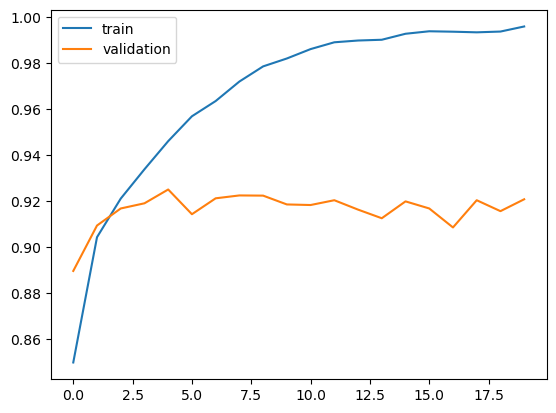

In [29]:
import matplotlib.pyplot as plt

# 각 epoch 별 train과 validation 데이터의 정확도 변화를 시각화
# train 데이터의 정확도가 가장 높은 지점 이후로 validation과의 차이가 벌어지는 것을 확인
# 이는 해당 지점부터 과적합이 발생했다는 의미로, 다음 학습 시에는 해당 지점 이전까지만 epoch를 돌려야 한다
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

In [ ]:
# 현재 모델 성능 검증
model.evaluate(test_images, test_oh_targets, batch_size=64, verbose=1)

In [30]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

INPUT_SIZE = 28

# shape = 28 * 28 이미지 채널(개수) 하나 
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

# input = 1
# kernel = 3 * 3 = 9
# filter(= output) = 32
# 파라미터 수 = (1 * 9 * 32) + 32 = 320
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)

# input = 32
# kernel = 3 * 3 = 9
# filter = 64
# 파라미터 수 = (32 * 9 * 64) + 64 = 18,496
# padding='same'을 주지 않았기 때문에 feature map의 사이즈가 줄어든다
# 사이즈 감소량은 kernel_size에 비례한다
x = Conv2D(filters=64, kernel_size=3, strides=1, activation='relu')(x)

# MaxPooling을 2로 설정했기 때문에 가로, 세로가 절반인 13 * 13이 된다
x = MaxPooling2D(2)(x)

# 파라미터 수: 13 * 13 * 64 = 10,816
x = Flatten()(x)

# 전체 파라미터 중 50%를 '비활성화' 시킨다
# 날리는 거 아님
x = Dropout(rate=0.5)(x)

# 파라미터 수: (10,816 * 50) + 50 = 540,850
x = Dense(50, activation='relu')(x)

# 파라미터 수: (50 * 10) + 10 = 510
# 출력층이기 때문에 activation은 softmax로 설정
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │         540,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,176 (2.14 MB)

 Trainable params: 560,176 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.datasets import fashion_mnist

# fashion 데이터 세트 불러오기
(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

# 위에서 선언한 함수로 스케일링, 원핫 인코딩, validation 데이터 분리
(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
                                            get_train_valid_test(train_images, train_targets, test_images, test_targets)

# train, validation, test 데이터 shape 출력
print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [32]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [33]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - acc: 0.7803 - loss: 0.6135 - val_acc: 0.8875 - val_loss: 0.3128
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - acc: 0.8889 - loss: 0.3078 - val_acc: 0.9041 - val_loss: 0.2727
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - acc: 0.9074 - loss: 0.2541 - val_acc: 0.9147 - val_loss: 0.2381
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - acc: 0.9171 - loss: 0.2231 - val_acc: 0.9133 - val_loss: 0.2413
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - acc: 0.9281 - loss: 0.1956 - val_acc: 0.9180 - val_loss: 0.2235
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - acc: 0.9364 - loss: 0.1705 - val_acc: 0.9231 - val_loss: 0.2085
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - acc: 0.9430 - loss: 0.1549 - val_acc: 0.9230 - val_loss: 0.2139
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - acc: 0.9463 - loss: 0.1409 - val_acc: 0.9254 - val_loss: 0.2168
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

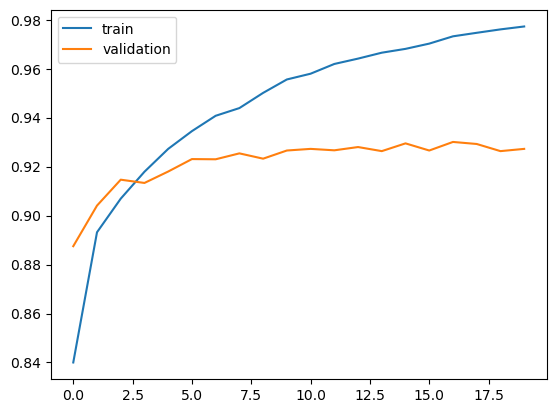

In [34]:
import matplotlib.pyplot as plt

# 각 epoch 별 train과 validation 데이터의 정확도 변화를 시각화
# train 데이터의 정확도가 가장 높은 지점 이후로 validation과의 차이가 벌어지는 것을 확인
# 이는 해당 지점부터 과적합이 발생했다는 의미로, 다음 학습 시에는 해당 지점 이전까지만 epoch를 돌려야 한다
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

In [35]:
# 현재 모델 성능 검증
model.evaluate(test_images, test_oh_targets, batch_size=64, verbose=1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9251 - loss: 0.3101


[0.31108543276786804, 0.9258000254631042]